# PreProcessing 

# importing libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Loading and Exploration | Cleaning 

In [96]:
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [97]:
# set options to be maximum for rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [98]:
# Hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [99]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [100]:
print("The number of rows are",df.shape[0]," and columns are",df.shape[1])

The number of rows are 10841  and columns are 13


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [102]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


# how to make Size a numeric column?

In [103]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

### Observations
- veries with device
- M
- K

In [104]:
df['Size'].isnull().sum()

0

- No missing value in size 

In [105]:
#verify the number of values| obsrtvation
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [106]:
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [107]:
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [108]:
8830+316+1695

10841

In [109]:
len(df)

10841

In [110]:
# convert the whole size column into bytes
# let's define a function
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', ""))*1024
        elif 'M' in size:
            return float(size.replace('M', ""))*1024*1024
        elif 'Varies with  device' in size:
            return np.nan
    return size

In [111]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
15                     2.7M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
23                     7.0M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
30                     9.2M
31                     5.2M
32                      11M
33                      11M
34                     4.2M
35                  

In [112]:
# let's apply this funtion
df['Size']=df['Size'].apply(convert_size)

In [113]:
df['Size']

0                19922944.0
1                14680064.0
2                 9122611.2
3                26214400.0
4                 2936012.8
5                 5872025.6
6                19922944.0
7                30408704.0
8                34603008.0
9                 3250585.6
10               29360128.0
11               12582912.0
12               20971520.0
13               22020096.0
14               38797312.0
15                2831155.2
16                5767168.0
17               17825792.0
18               40894464.0
19               32505856.0
20               14680064.0
21               12582912.0
22                4404019.2
23                7340032.0
24               24117248.0
25                6291456.0
26               26214400.0
27                6396313.6
28                4823449.6
29                4404019.2
30                9646899.2
31                5452595.2
32               11534336.0
33               11534336.0
34                4404019.2
35                96

In [114]:
#rename
df.rename(columns={'Size':"Size_in_bytes"},inplace=True)

In [115]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [116]:
df['Size_in_bytes'] = pd.to_numeric(df['Size_in_bytes'], errors='coerce')
df['Size_in_Mb'] = df['Size_in_bytes'] / (1024 * 1024)


In [117]:
#let's take care of installs
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [118]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [119]:
df['Installs'].isnull().sum()

0

- no missing values

### Observations
- remove + sign
- remove ,
- Convert the column into an integer

In [120]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)

In [121]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

In [122]:
df['Installs']= df['Installs'].apply(lambda x: int(x))

In [123]:
df["Installs"].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [124]:
df["Installs"].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [125]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000


# Price column 

In [126]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

### Observations 
- $ sign

In [127]:
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [128]:
 df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

10041

In [129]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)

In [130]:
df['Price'].value_counts()

Price
0         10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.

In [131]:
# Now we can conver it into numerics

In [132]:
df['Price'] = df['Price'].apply(lambda x: float(x))

In [133]:
df['Price']

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
5          0.00
6          0.00
7          0.00
8          0.00
9          0.00
10         0.00
11         0.00
12         0.00
13         0.00
14         0.00
15         0.00
16         0.00
17         0.00
18         0.00
19         0.00
20         0.00
21         0.00
22         0.00
23         0.00
24         0.00
25         0.00
26         0.00
27         0.00
28         0.00
29         0.00
30         0.00
31         0.00
32         0.00
33         0.00
34         0.00
35         0.00
36         0.00
37         0.00
38         0.00
39         0.00
40         0.00
41         0.00
42         0.00
43         0.00
44         0.00
45         0.00
46         0.00
47         0.00
48         0.00
49         0.00
50         0.00
51         0.00
52         0.00
53         0.00
54         0.00
55         0.00
56         0.00
57         0.00
58         0.00
59         0.00
60         0.00
61         0.00
62      

In [134]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [135]:
# using  string print min, max and average prices of the app
print("Min Price is", df['Price'].min())
print("Max Price is", df['Price'].max())
print("Average Price is", df['Price'].mean())

Min Price is 0.0
Max Price is 400.0
Average Price is 1.0272733142699015


In [136]:
# missing values inside the Data

In [137]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes     1695
Size_in_Mb        1695
Rating            1474
Current Ver          8
Android Ver          2
Category             1
Type                 1
Genres               1
App                  0
Reviews              0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

In [138]:
# find missing values percentage in data 
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

Size_in_bytes     15.64
Size_in_Mb        15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.02
Category           0.01
Type               0.01
Genres             0.01
App                0.00
Reviews            0.00
Installs           0.00
Price              0.00
Content Rating     0.00
Last Updated       0.00
dtype: float64

In [139]:
# total number of missing values
df.isnull().sum().sum()

4877

<Axes: >

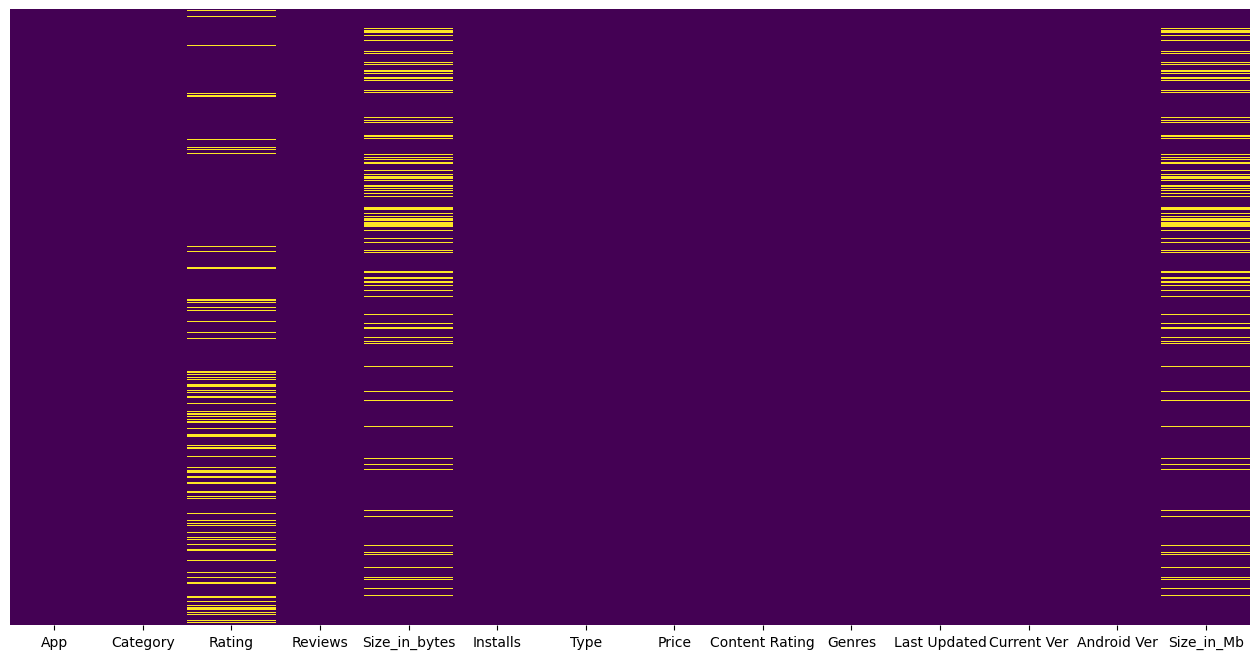

In [140]:
#Plot missing values
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

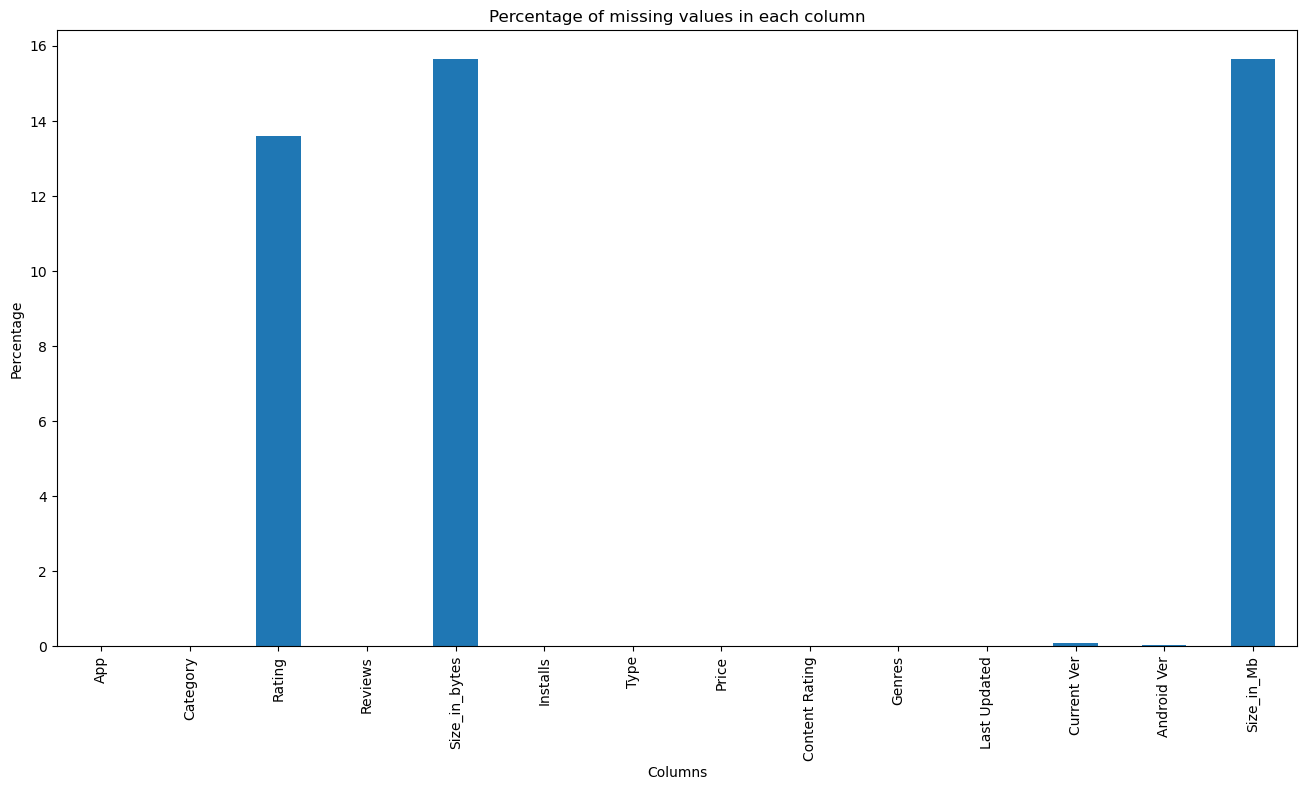

In [141]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage.plot(kind='bar')

# Adding labels and title
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column')

plt.show()  # Display the plot

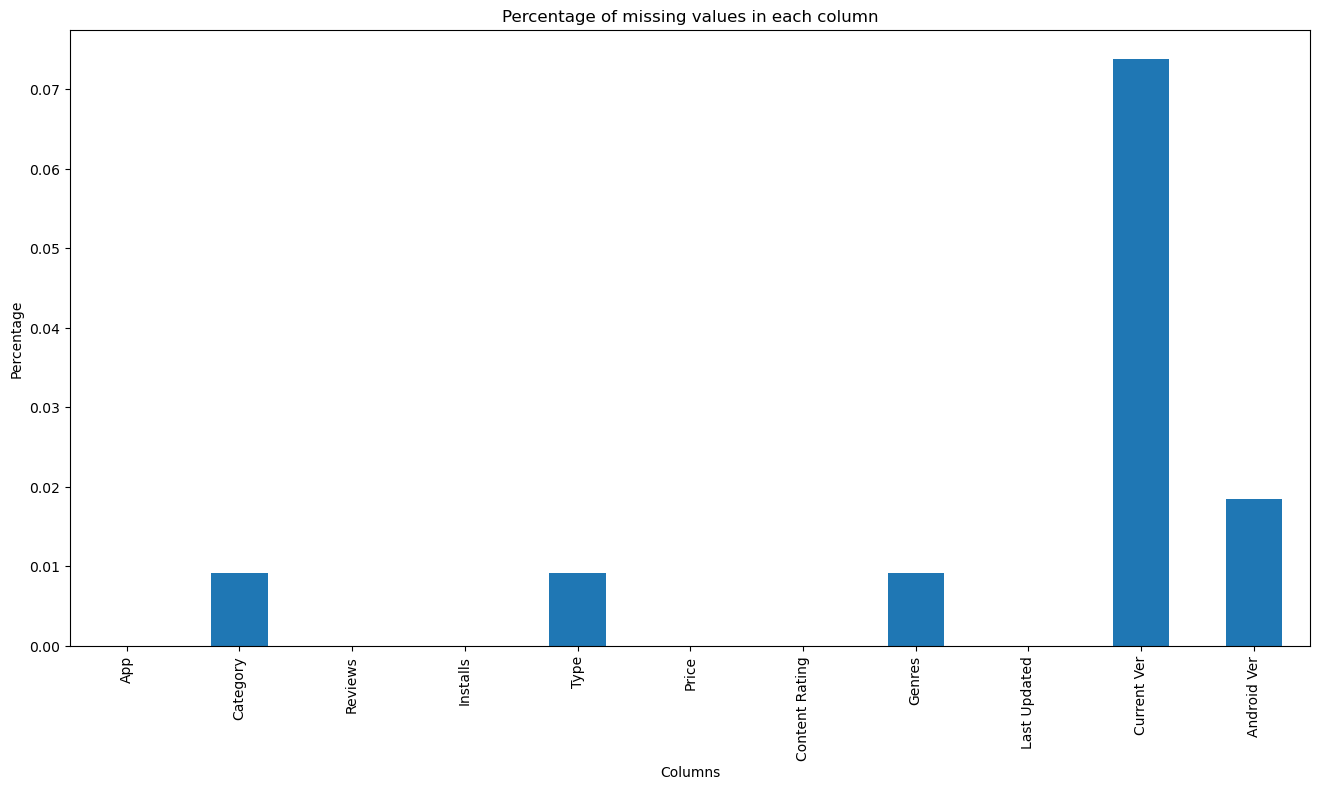

In [142]:
plt.figure(figsize=(16, 8))
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage[missing_percentage < 1].plot(kind='bar')

# Adding labels and title
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column')

plt.show()  # Display the plot

# From Last Updated Extract 
- day
- month
- year

In [143]:
 # Convert 'Last Updated' column to datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Extract day, month, and year into separate columns
df['Day'] = df['Last Updated'].dt.day
df['Month'] = df['Last Updated'].dt.month
df['Year'] = df['Last Updated'].dt.year

In [144]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25.0,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8,20,6,2018


In [145]:
from scipy import stats

# Dealing with the Missing values

In [146]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Size_in_bytes     15.635089
Size_in_Mb        15.635089
Rating            13.596532
Current Ver        0.073794
Android Ver        0.018448
Type               0.009224
Category           0.009224
Genres             0.009224
App                0.000000
Month              0.000000
Day                0.000000
Content Rating     0.000000
Last Updated       0.000000
Price              0.000000
Installs           0.000000
Reviews            0.000000
Year               0.000000
dtype: float64

In [147]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Last Updated,Size_in_Mb,Day,Month,Year
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,10841,9146.000000,10841.000000,10841.000000,10841.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,2017-11-21 06:53:53.723825920,21.514141,15.608615,6.421917,2017.399779
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,2010-05-21 00:00:00,0.008301,1.000000,1.000000,2010.000000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,2017-09-20 00:00:00,4.900000,6.000000,5.000000,2017.000000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,2018-05-24 00:00:00,13.000000,16.000000,7.000000,2018.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,2018-07-20 00:00:00,30.000000,24.000000,8.000000,2018.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,2018-08-08 00:00:00,100.000000,31.000000,12.000000,2018.000000
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,NaN,22.588679,9.561282,2.578619,1.100879


<Axes: >

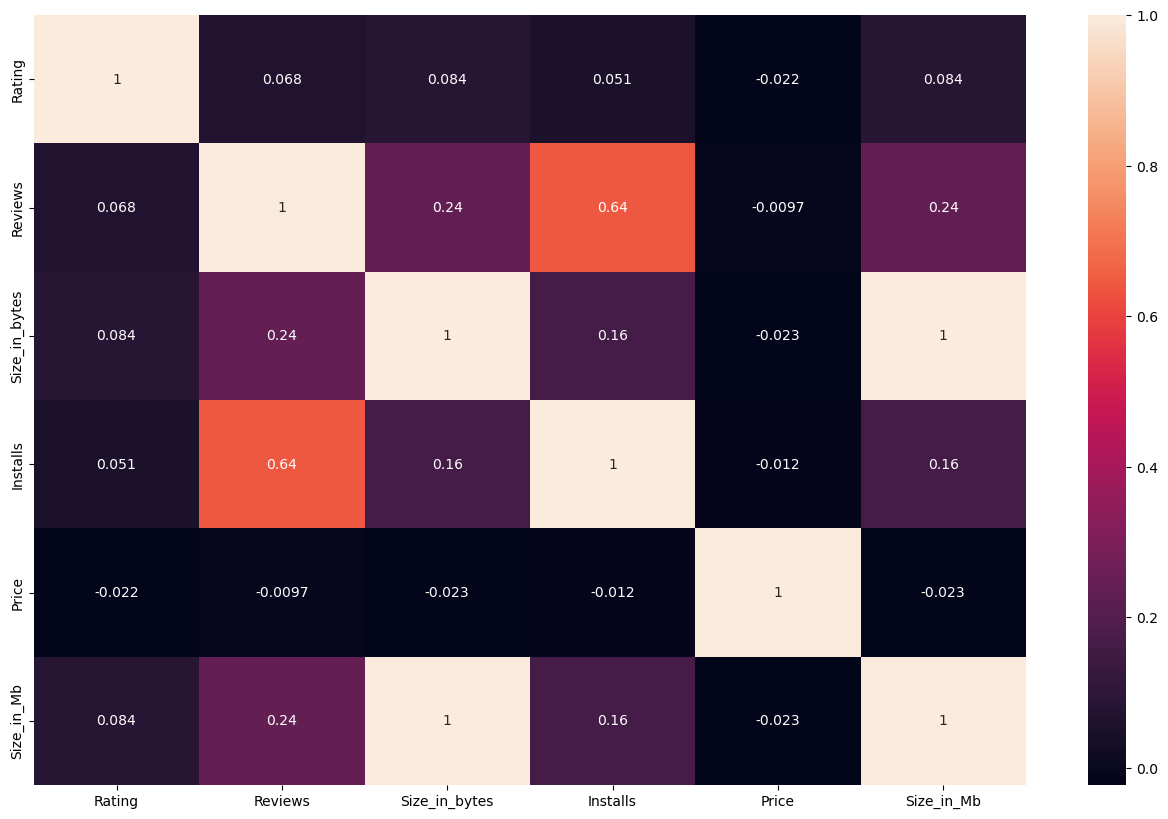

In [148]:
# make a correlation matrix of numeric columns
plt.figure(figsize=(16,10))
numeric_cols = ['Rating','Reviews','Size_in_bytes','Installs','Price','Size_in_Mb']
sns.heatmap(df[numeric_cols].corr(), annot = True)

In [149]:
df[numeric_cols].corr()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


In [150]:
#remove rows containing NaN or infinite Values
df_clean=df.dropna()
# Calculate Pearson's R between Reviews and Installs
pearson_r = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print("Pearson's R between Reviews and Installs:\n ", pearson_r)

Pearson's R between Reviews and Installs:
  PearsonRResult(statistic=0.6261872485357, pvalue=0.0)


In [151]:
print("Lenth if DataFrame before removinig null values:",len(df))

Lenth if DataFrame before removinig null values: 10841


In [152]:
#Remove the rows having null values in the 
df.dropna(subset=['Current Ver','Android Ver','Category','Type','Genres'], inplace=True)

In [153]:
# length after removing null values
print("Lenght of the DataFrame after romoving null values:",len(df))

Lenght of the DataFrame after romoving null values: 10829


- we have removed 12 rows having null values in the Current Ver,Android Ver,Category,Type and Genres columns.

In [154]:
print(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Day', 'Month', 'Year'],
      dtype='object')


In [155]:
# lets check again null values
df.isnull().sum().sort_values(ascending=False)
df['Installs'].loc[df['Rating'].isnull()].value_counts()

Installs
100        409
10         316
1000       193
50         149
500        129
5           73
1           64
5000        45
10000       43
100000      19
0           14
50000       12
1000000      2
500000       1
Name: count, dtype: int64

In [156]:
 df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Day', 'Month', 'Year'],
      dtype='object')

In [157]:
# use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs,,,,,,,,
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,5.000000,0.000000,5.0,5.00,5.0,5.000,5.0
5,9.0,4.611111,1.166667,1.5,5.00,5.0,5.000,5.0
10,69.0,4.624638,0.821119,1.0,4.80,5.0,5.000,5.0
50,56.0,4.419643,1.046799,1.0,4.35,5.0,5.000,5.0
100,309.0,4.363430,0.847641,1.0,4.00,4.7,5.000,5.0
500,201.0,4.176617,0.801873,1.0,3.90,4.4,4.700,5.0
1000,712.0,4.066292,0.784476,1.0,3.70,4.3,4.600,5.0
5000,431.0,4.026450,0.636302,1.4,3.70,4.2,4.500,5.0


<Axes: xlabel='Installs', ylabel='Rating'>

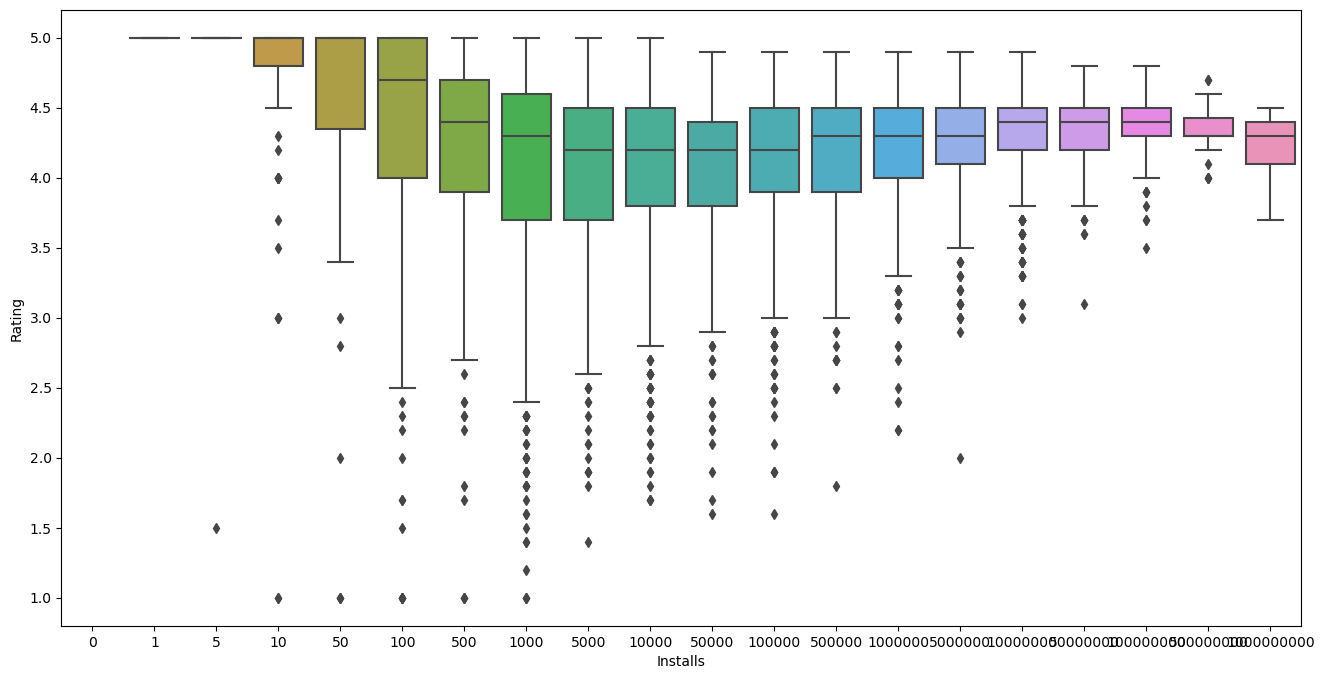

In [158]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Installs', y='Rating',data=df)


<Axes: xlabel='Rating', ylabel='Reviews'>

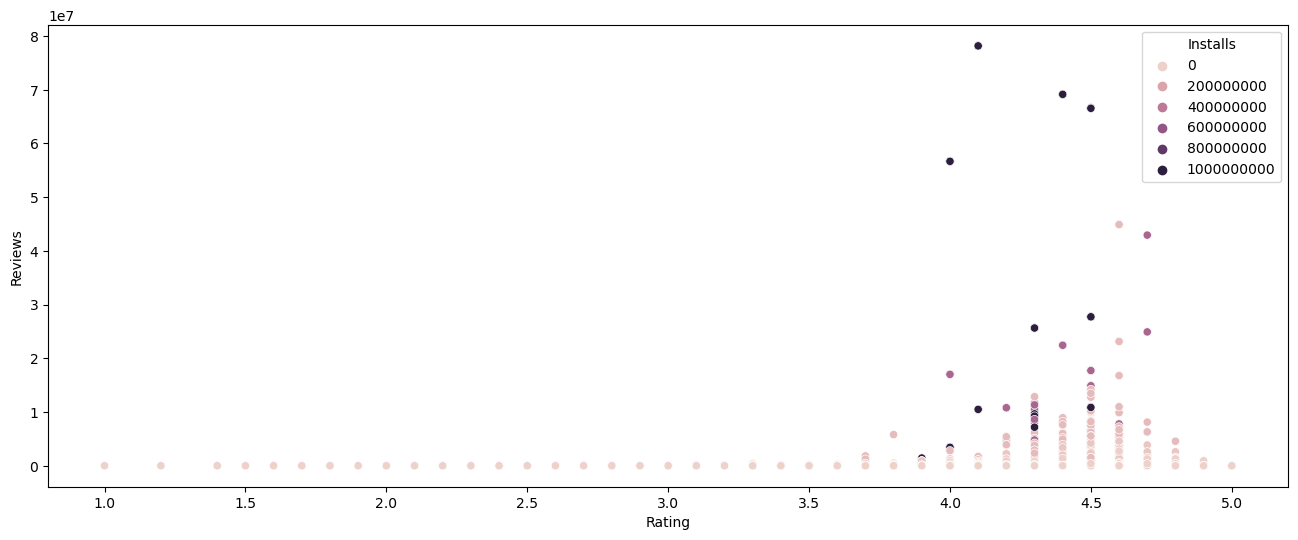

In [159]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Rating',y='Reviews',hue='Installs',data=df)

<Axes: xlabel='Reviews', ylabel='Installs'>

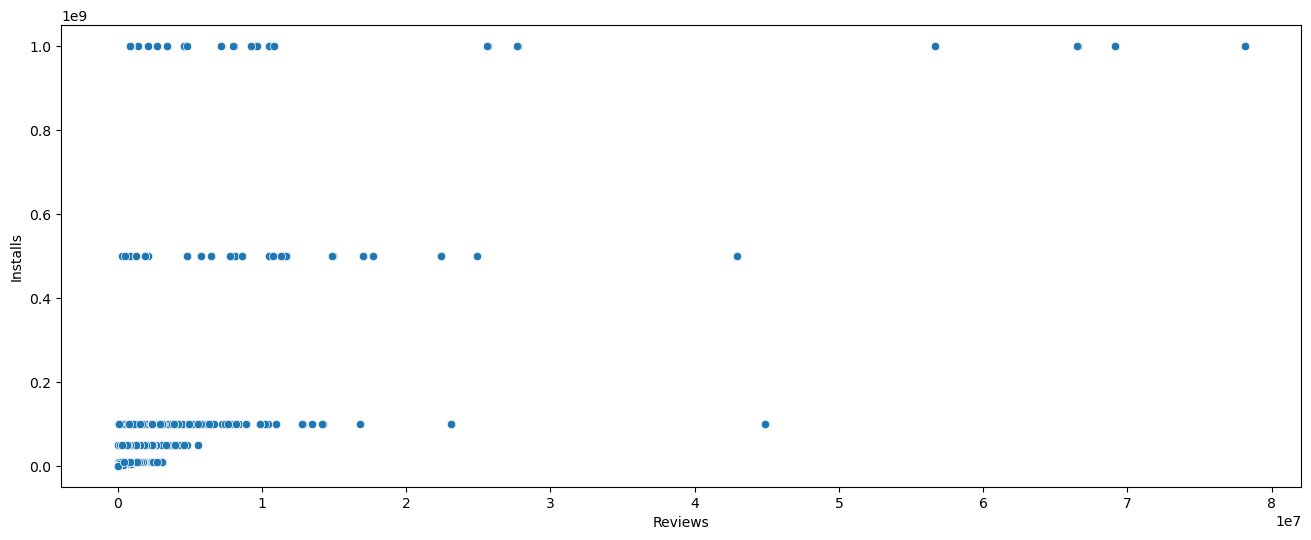

In [160]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Reviews',y='Installs',data=df)

<Axes: xlabel='Reviews', ylabel='Installs'>

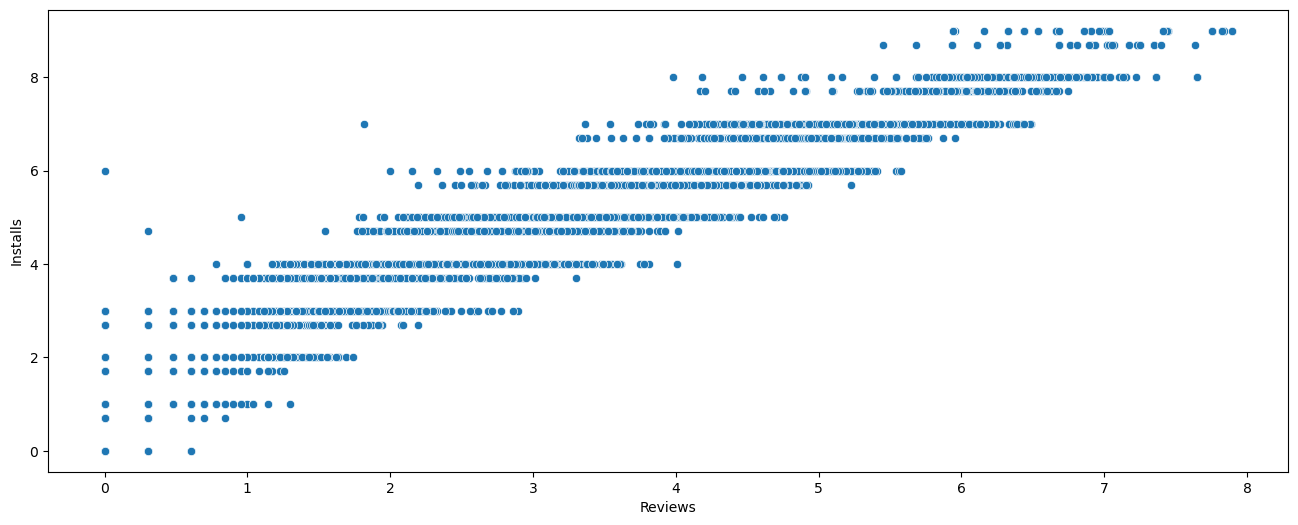

In [161]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']),data=df)

<Figure size 1600x600 with 0 Axes>

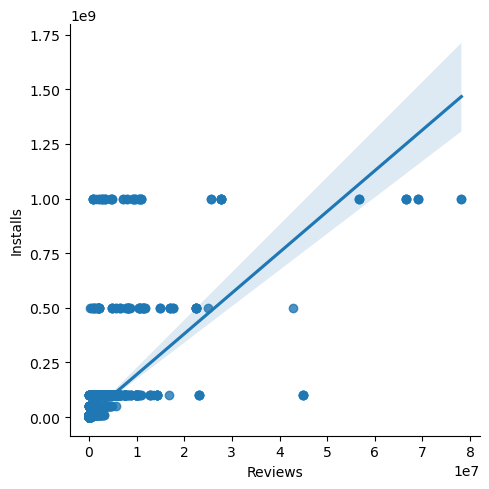

In [162]:
plt.figure(figsize=(16,6))
sns.lmplot(x='Reviews',y='Installs',data=df)

# Observation 
  - Rating and Reviews is directly proportional to the Installation

# Duplicates
  - romoving duplicate values because for accuracy  

In [163]:
# Total duplicate values
df.duplicated().sum()

483

In [164]:
# find duplicate if any in the 'App' column
df['App'].duplicated().sum()

1181

In [165]:
for col in df.columns:
    print('Number of duplicates in ', col,' column are:',df[col].duplicated().sum())

Number of duplicates in  App  column are: 1181
Number of duplicates in  Category  column are: 10796
Number of duplicates in  Rating  column are: 10789
Number of duplicates in  Reviews  column are: 4830
Number of duplicates in  Size_in_bytes  column are: 10373
Number of duplicates in  Installs  column are: 10809
Number of duplicates in  Type  column are: 10827
Number of duplicates in  Price  column are: 10737
Number of duplicates in  Content Rating  column are: 10823
Number of duplicates in  Genres  column are: 10710
Number of duplicates in  Last Updated  column are: 9453
Number of duplicates in  Current Ver  column are: 8046
Number of duplicates in  Android Ver  column are: 10796
Number of duplicates in  Size_in_Mb  column are: 10373
Number of duplicates in  Day  column are: 10798
Number of duplicates in  Month  column are: 10817
Number of duplicates in  Year  column are: 10820


  - this mean that the only better way to find duplicates is to check for whole data

In [166]:
# print the number of duplicated in df
print('Number of duplicated in df are: ', df.duplicated().sum())

Number of duplicated in df are:  483


  - find and watch all duplicates if they are real!

In [167]:
#find exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Day,Month,Year
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,3.800000,17,2,2017
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,3.800000,17,2,2017
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up,26.000000,27,7,2018
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up,26.000000,27,7,2018
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up,3.800000,27,1,2017
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up,3.800000,27,1,2017
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,2018-08-02,3.0.0,4.1 and up,15.000000,2,8,2018
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,2018-08-02,3.0.0,4.1 and up,15.000000,2,8,2018
3083,365Scores - Live Scores,SPORTS,4.6,666521,26214400.0,10000000,Free,0.00,Everyone,Sports,2018-07-29,5.5.9,4.1 and up,25.000000,29,7,2018
5415,365Scores - Live Scores,SPORTS,4.6,666246,26214400.0,10000000,Free,0.00,Everyone,Sports,2018-07-29,5.5.9,4.1 and up,25.000000,29,7,2018


# Now 
  - Remove Duplicates

In [168]:
df.drop_duplicates(inplace=True)

In [169]:
# Print the number of rows and columns after removing duplicates
print('Number of rows after removinig Duplicates: ', df.shape[0],' and Columns: ' , df.shape[1])

Number of rows after removinig Duplicates:  10346  and Columns:  17


  - Now we have removed 483 duplicates from the dataset and have 10346 rows left

---

# 3. Insights from Data

### a). which category has the highest number of apps?

In [170]:
# To show top 10 highest Category number of apps
df['Category'].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

### b). Which category has the highest number od installs?

In [171]:
df.groupby('Category')['Installs'].sum().sort_values(ascending = False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

### c). Which category has the highest number of reviews?

In [172]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

### d). Which category has the highest rating ?

In [173]:
# Highest Rating
df.groupby('Category')['Rating'].max().sort_values(ascending=False).head(10)

Category
ART_AND_DESIGN        5.0
GAME                  5.0
SPORTS                5.0
SOCIAL                5.0
SHOPPING              5.0
PRODUCTIVITY          5.0
PHOTOGRAPHY           5.0
PERSONALIZATION       5.0
PARENTING             5.0
NEWS_AND_MAGAZINES    5.0
Name: Rating, dtype: float64

In [174]:
# Average highest rationg
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
ART_AND_DESIGN         4.377049
EDUCATION              4.375969
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333117
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
Name: Rating, dtype: float64

### Plot Rating Density

<Axes: xlabel='Rating', ylabel='Density'>

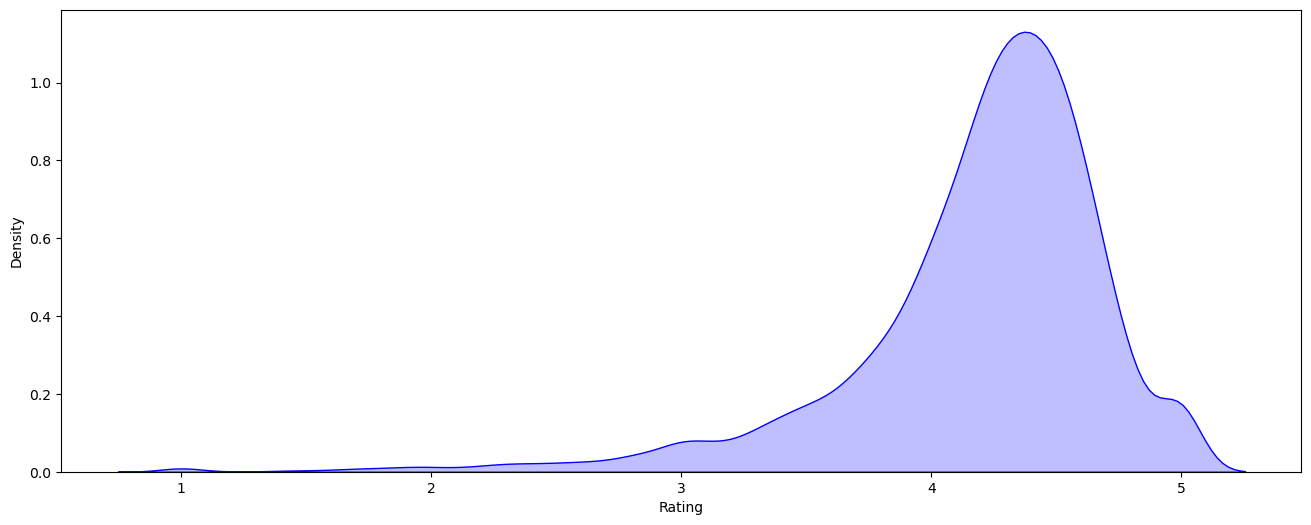

In [177]:
# Plot the rating distribution
plt.figure(figsize=(16,6))
sns.kdeplot(df['Rating'], color='blue', shade=True)

---
# Very important for All

<Axes: xlabel='Type', ylabel='Installs'>

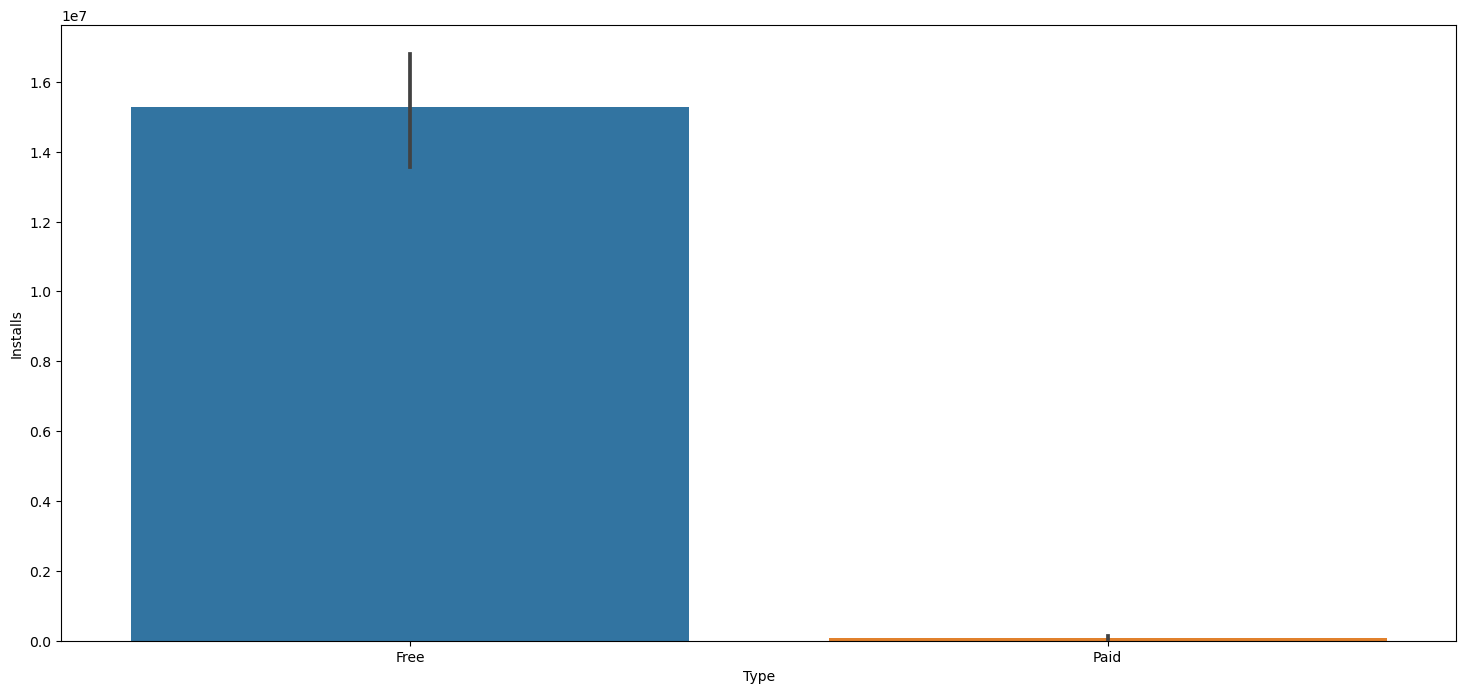

In [182]:
# plot number of install for free vs paid apps make a bar plot
plt.figure(figsize=(18,8))
sns.barplot(x='Type', y='Installs', data= df)

<Axes: xlabel='Installs', ylabel='Price'>

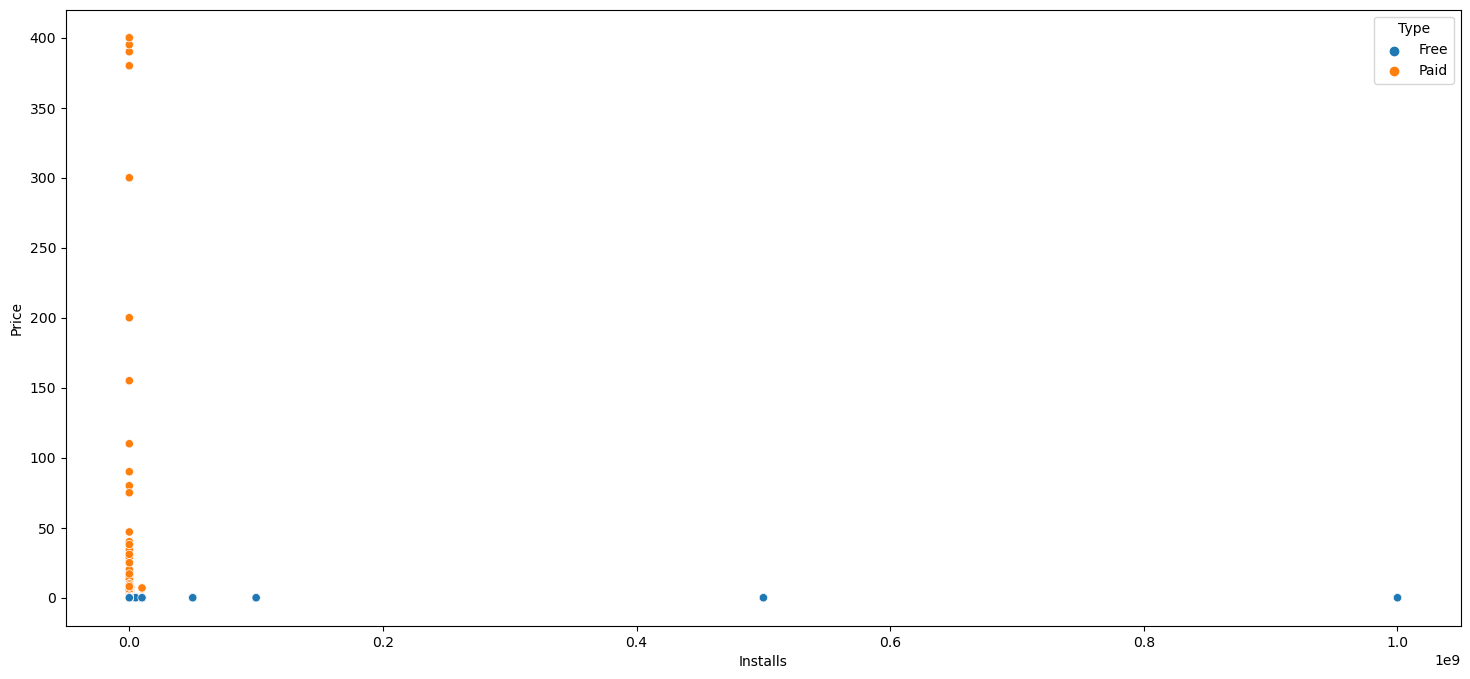

In [183]:
#show scatter plot as well where x-axis is Installs ans y-axis is price ans hue is Type
plt.figure(figsize=(18,8))
sns.scatterplot(x='Installs', y='Price', hue='Type', data=df)